In [1]:
%matplotlib inline
#%matplotlib widget

In [2]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [3]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A

In [4]:
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\all_linking_passive_data_28cm.csv'
passive_path_packaged='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
Passive_path_table=pd.read_csv(passive_path,index_col=0)
emsd_data=pd.DataFrame()
bottypes=['fronter','aligner']
botnums=[1,4,8,16,21,53]
#rerelevant_data=Passive_path_table.loc[bottype,diameter]
for botnum in botnums:
    for bottype in bottypes:
        relevant_data=Passive_path_table[(Passive_path_table['BotNum']==botnum)&(Passive_path_table['BotType']==bottype)]
        filenames=pd.unique(relevant_data['Filename'])
        print(filenames)
        particle=0
        for filename in filenames:
            emsd_file_data=relevant_data[(relevant_data['Filename']==filename)]
            emsd_file_data=emsd_file_data.iloc[:,0:4]
            emsd_file_data['particle']=[particle]*len(emsd_file_data)
            emsd_file_data['BotNum']=[botnum]*len(emsd_file_data)
            emsd_file_data['BotType']=[bottype]*len(emsd_file_data)
            emsd_data=pd.concat([emsd_data,emsd_file_data],axis=0,ignore_index=True)
            particle=particle+1
print(emsd_data)

['fronter_N001_D028_C0556.MP4_link.csv'
 'fronter_N001_D028_C0555.MP4_link.csv'
 'updated_test_fronter_N001_D028_C0554.MP4_link.csv'
 'updated_test_fronter_N001_D028_C0553.MP4_link.csv']
['aligner_N001_D028_C0575.MP4_link.csv'
 'aligner_N001_D028_C0574.MP4_link.csv'
 'aligner_N001_D028_C0573.MP4_link.csv'
 'aligner_N001_D028_C0572.MP4_link.csv']
['fronter_N004_D028_C0560.MP4_link.csv'
 'fronter_N004_D028_C0559.MP4_link.csv'
 'fronter_N004_D028_C0558.MP4_link.csv'
 'fronter_N004_D028_C0557.MP4_link.csv']
['aligner_N004_D028_C0580.MP4_link.csv'
 'aligner_N004_D028_C0579.MP4_link.csv'
 'aligner_N004_D028_C0578.MP4_link.csv'
 'aligner_N004_D028_C0577.MP4_link.csv'
 'aligner_N004_D028_C0576.MP4_link.csv']
['fronter_N008_D028_C0567.MP4_link.csv'
 'fronter_N008_D028_C0566.MP4_link.csv'
 'fronter_N008_D028_C0565.MP4_link.csv'
 'fronter_N008_D028_C0563.MP4_link.csv'
 'fronter_N008_D028_C0562.MP4_link.csv']
['aligner_N008_D028_C0587.MP4_link.csv'
 'aligner_N008_D028_C0586.MP4_link.csv'
 'aligner

[ 1.7946323  -3.52159432]
[0.00108918 0.00341448]


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


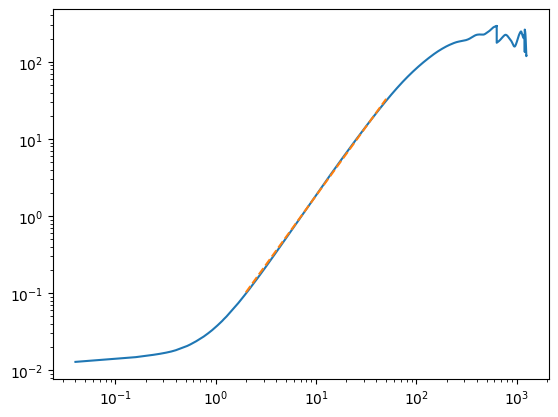

In [14]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels/2 #[cm/pixel]
bottype='fronter'
botnum=16
relevant_emsd=emsd_data[(emsd_data['BotNum']==botnum)&(emsd_data['BotType']==bottype)]
#print(relevant_emsd)
emsd_data_filtered = tp.filter_stubs(relevant_emsd,threshold=100)
max_lagtime=int(len(emsd_data_filtered)/3)
emsd=tp.emsd(emsd_data_filtered,fps=fps,mpp=mpp,max_lagtime=max_lagtime)
emsd_small_range=emsd.loc[2:50]
#emsd_small_range=emsd.loc[4:20]
p0=np.array([2,0.5])
popt,pcov = sc.optimize.curve_fit(linear_fit_log,np.log(emsd_small_range.index),np.log(emsd_small_range),p0=p0)
perr = np.sqrt(np.diag(pcov))
corr=np.corrcoef(pcov,rowvar=True)
print(popt)
print(perr)
fig, ax = plt.subplots()
ax.plot(emsd.index, emsd)
ax.set_xscale('log')
ax.set_yscale('log')
fit_x=np.log(emsd_small_range.index)
fit_y=fit_x*popt[0]+popt[1]
ax.loglog(np.exp(fit_x),np.exp(fit_y),'--')

In [8]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels/2 #[cm/pixel]
emsd_results=pd.DataFrame()
bottypes=['fronter','aligner']
botnums=[1,4,8,16,21,53]
for botnum in botnums:
    for bottype in bottypes:
        print("BotNum {},BotType {}".format(botnum,bottype))
        data_row=pd.DataFrame()
        relevant_emsd=emsd_data[(emsd_data['BotNum']==botnum)&(emsd_data['BotType']==bottype)]
        #print(relevant_emsd)
        emsd_data_filtered = tp.filter_stubs(relevant_emsd,threshold=100)
        max_lagtime=int(len(emsd_data_filtered)/3)
        emsd=tp.emsd(emsd_data_filtered,fps=fps,mpp=mpp,max_lagtime=max_lagtime)
        emsd_large_range=emsd.loc[2:50]
        emsd_small_range=emsd.loc[4:20]
        p0=np.array([2,0.5])
        popt_min,pcov_min = sc.optimize.curve_fit(linear_fit_log,np.log(emsd_small_range.index),np.log(emsd_small_range),p0=p0)
        perr_min = np.sqrt(np.diag(pcov_min))
        corr_min=np.corrcoef(pcov_min,rowvar=True)
        popt_max,pcov_max = sc.optimize.curve_fit(linear_fit_log,np.log(emsd_large_range.index),np.log(emsd_large_range),p0=p0)
        perr_max = np.sqrt(np.diag(pcov_max))
        corr_max=np.corrcoef(pcov_max,rowvar=True)
        data_row['BotNum']=[botnum]
        data_row['BotType']=[bottype]
        data_row['n_max']=[popt_max[0]]
        data_row['n_max_err']=[perr_max[0]]
        data_row['A_max']=[np.exp(popt_max[1])]
        data_row['A_max_err']=[perr_max[1]]
        data_row['n_min']=[popt_min[0]]
        data_row['n_min_err']=[perr_min[0]]
        data_row['A_min']=[np.exp(popt_min[1])]
        data_row['A_min_err']=[perr_min[1]]
        emsd_results=pd.concat([emsd_results,data_row],axis=0)
emsd_results.to_csv(passive_path_packaged+'\\power_law_28cm_diameter_emsd.csv')

BotNum 1,BotType fronter


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


BotNum 1,BotType aligner


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


BotNum 4,BotType fronter


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


BotNum 4,BotType aligner


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


BotNum 8,BotType fronter


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


BotNum 8,BotType aligner


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


BotNum 16,BotType fronter


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


BotNum 16,BotType aligner


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


BotNum 21,BotType fronter


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


BotNum 21,BotType aligner


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupb

BotNum 53,BotType fronter
BotNum 53,BotType aligner


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:235: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = msds.mul(msds['N'], axis=0).mean(level=1)  # weighted average
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\trackpy\motion.py:236: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  results = results.div(msds['N'].mean(level=1), axis=0)  # weights normalized


In [9]:
mean_data=emsd_results.groupby(by=["BotType","BotNum"]).mean()
print(mean_data.loc[("fronter","n_min")])
std_data=emsd_results.groupby(by=["BotType","BotNum"]).std()
#print(std_data)

BotNum
1     1.787727
4     1.836116
8     1.793718
16    1.847236
21    1.764592
53    1.738613
Name: n_min, dtype: float64


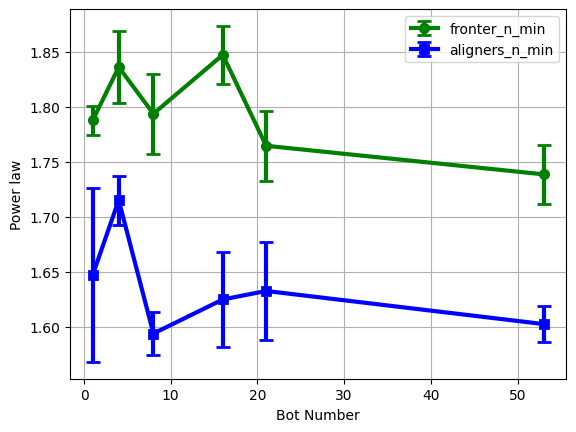

In [15]:
fronter_data=mean_data.loc[("fronter","n_min")]
fronter_data_max= mean_data.loc[("fronter","n_max")]
fronter_diff=fronter_data-fronter_data_max
aligner_data=mean_data.loc[("aligner","n_min")]
aligner_data_max=mean_data.loc[("aligner","n_max")]
aligner_diff=aligner_data-aligner_data_max
fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_data,label='fronter_n_min',yerr=np.abs(fronter_diff.to_numpy())/2,marker='o',capsize=5,color='green'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_data.index,y=aligner_data,label='aligners_n_min',yerr=np.abs(aligner_diff.to_numpy())/2,marker='s',capsize=5,color='blue'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Bot Number')
ax.set_ylabel('Power law')
ax.grid()
ax.legend()
saved_data=pd.DataFrame(data={'fronter_data': fronter_data
                              ,'fronter_data_max': fronter_data_max,'fronter_diff':fronter_diff,'aligner_data':aligner_data
                              ,'aligner_data_max':aligner_data_max,'aligner_diff':aligner_diff})
saved_data.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\emsd_powerlaw_vs_Botnum_28cm.csv')
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\emsd_powerlaw_vs_Botnum_28cm.png',bbox_inches='tight')